<a href="https://colab.research.google.com/github/kelseyneis/horoscope-mining/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI 5523 Final project
Mohammed Guiga, Kelsey Neis, Sai Sharan Sundar, Josh Spitzer-Resnick

## imports

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
# for reading csv in Colab
# from google.colab import files
# uploaded = files.upload() # if first time uncomment this and manually load in data # use chrome not firefox, not incognito
# uploaded = files.upload()
sns.set_theme(style="darkgrid")

In [40]:
# df = pd.read_csv( io.BytesIO(uploaded['horoscope_saved.csv']) ) # nrows = 100
df = pd.read_csv("../horoscope_saved.csv")
# horoscopes = np.genfromtxt(io.BytesIO(uploaded['horoscope_saved.csv']), delimiter = ',', max_rows = 100)

In [41]:
signs = ['aries', 'taurus', 'gemini', 'cancer', 'leo', 'virgo', 'libra', 'scorpio', 'sagittarius', 'capricorn', 'aquarius', 'pisces']
exaltation = {'aries':'sun', 'taurus':'venus', 'gemini':'mercury', 'cancer':'moon', 'leo':'sun', 'virgo':'mercury', 'libra':'venus', 'scorpio':'mars', 'sagittarius':'jupiter', 'capricorn':'saturn', 'aquarius':'saturn', 'pisces':'jupiter'}
detriment = {'aries':'venus', 'taurus': 'mars', 'gemini':'jupiter', 'cancer':'saturn', 'leo':'saturn', 'virgo':'jupiter', 'libra':'mars', 'scorpio':'venus', 'sagittarius':'mercury', 'capricorn':'moon', 'aquarius':'sun', 'pisces':'mercury'}

In [42]:
df['exaltation'] = df['sign'].map(exaltation)
df['detriment'] = df['sign'].map(detriment)
df['planet'] = None

In [43]:
df.loc[(df['sign'] == 'aquarius') & (df['date'] >= 20200615) & (df['date'] < 20200701), 'planet'] = 'saturn'
df.loc[(df['sign'] == 'cancer') & (df['date'] >= 20200620) & (df['date'] < 20200722), 'planet'] = 'sun'
df.loc[(df['sign'] == 'cancer') & (df['date'] >= 20200621) & (df['date'] < 20200705), 'planet'] = 'moon'
df.loc[(df['sign'] == 'aries') & (df['date'] >= 20200628) & (df['date'] < 20210106), 'planet'] = 'mars'
df.loc[(df['sign'] == 'capricorn') & (df['date'] >= 20200705) & (df['date'] < 20200803), 'planet'] = 'moon'
df.loc[(df['sign'] == 'leo') & (df['date'] >= 20200722) & (df['date'] < 20200822), 'planet'] = 'sun'
df.loc[(df['sign'] == 'aquarius') & (df['date'] >= 20200803) & (df['date'] < 20200902), 'planet'] = 'moon'
df.loc[(df['sign'] == 'virgo') & (df['date'] >= 20200822) & (df['date'] < 20200922), 'planet'] = 'sun'
df.loc[(df['sign'] == 'leo') & (df['date'] >= 20200805) & (df['date'] < 20200820), 'planet'] = 'mercury'
df.loc[(df['sign'] == 'virgo') & (df['date'] >= 20200822) & (df['date'] < 20200905), 'planet'] = 'mercury'
df.loc[(df['sign'] == 'cancer') & (df['date'] >= 20200807) & (df['date'] < 20200820), 'planet'] = 'venus'
df.loc[(df['sign'] == 'libra') & (df['date'] >= 20200922) & (df['date'] < 20201022), 'planet'] = 'sun'
df.loc[(df['sign'] == 'pisces') & (df['date'] >= 20200902) & (df['date'] < 20200922), 'planet'] = 'moon'
df.loc[(df['sign'] == 'libra') & (df['date'] >= 20200905) & (df['date'] < 20200927), 'planet'] = 'mercury'
df.loc[(df['sign'] == 'scorpio') & (df['date'] >= 20200927) & (df['date'] < 20201028), 'planet'] = 'mercury'
df.loc[(df['sign'] == 'leo') & (df['date'] >= 20200906) & (df['date'] < 20200927), 'planet'] = 'venus'
df.loc[(df['sign'] == 'scorpio') & (df['date'] >= 20201022) & (df['date'] < 20201121), 'planet'] = 'sun'
df.loc[(df['sign'] == 'aries') & (df['date'] >= 20201001) & (df['date'] < 20201031), 'planet'] = 'moon'
df.loc[(df['sign'] == 'taurus') & (df['date'] >= 20201031) & (df['date'] < 20201130), 'planet'] = 'moon'
df.loc[(df['sign'] == 'virgo') & (df['date'] >= 20201002) & (df['date'] < 20201028), 'planet'] = 'venus'
df.loc[(df['sign'] == 'libra') & (df['date'] >= 20201028) & (df['date'] < 20201121), 'planet'] = 'venus'
df.loc[(df['sign'] == 'sagittarius') & (df['date'] >= 20201121) & (df['date'] < 20201221), 'planet'] = 'sun'
df.loc[(df['sign'] == 'gemini') & (df['date'] >= 20201130) & (df['date'] < 20201230), 'planet'] = 'moon'
df.loc[(df['sign'] == 'scorpio') & (df['date'] >= 20201110) & (df['date'] < 202012001), 'planet'] = 'mercury'
df.loc[(df['sign'] == 'scorpio') & (df['date'] >= 20201121) & (df['date'] < 20201215), 'planet'] = 'venus'
df.loc[(df['sign'] == 'capricorn') & (df['date'] >= 20201221) & (df['date'] < 20210119), 'planet'] = 'sun'
df.loc[(df['sign'] == 'cancer') & (df['date'] >= 20201230) & (df['date'] < 20210128), 'planet'] = 'moon'
df.loc[(df['sign'] == 'sagittarius') & (df['date'] >= 20201201) & (df['date'] < 202012020), 'planet'] = 'mercury'
df.loc[(df['sign'] == 'capricorn') & (df['date'] >= 20201220) & (df['date'] < 20210108), 'planet'] = 'mercury'
df.loc[(df['sign'] == 'sagittarius') & (df['date'] >= 20201215) & (df['date'] < 20210108), 'planet'] = 'venus'
df.loc[(df['sign'] == 'aquarius') & (df['date'] >= 20201217) & (df['date'] < 20210619), 'planet'] = 'saturn'
df.loc[(df['sign'] == 'aquarius') & (df['date'] >= 20201219) & (df['date'] < 20210513), 'planet'] = 'jupiter'
df.loc[(df['sign'] == 'aquarius') & (df['date'] >= 20210119) & (df['date'] < 20210218), 'planet'] = 'sun'
df.loc[(df['sign'] == 'leo') & (df['date'] >= 20210128) & (df['date'] < 20210227), 'planet'] = 'moon'
df.loc[(df['sign'] == 'aquarius') & (df['date'] >= 20210108) & (df['date'] < 20210315), 'planet'] = 'mercury'
df.loc[(df['sign'] == 'capricorn') & (df['date'] >= 20201215) & (df['date'] < 20210108), 'planet'] = 'venus'
df.loc[(df['sign'] == 'taurus') & (df['date'] >= 20210106) & (df['date'] < 20210304), 'planet'] = 'mars'
df.loc[(df['sign'] == 'pisces') & (df['date'] >= 20210218) & (df['date'] < 20210320), 'planet'] = 'sun'
df.loc[(df['sign'] == 'virgo') & (df['date'] >= 20210227) & (df['date'] < 20210328), 'planet'] = 'moon'
df.loc[(df['sign'] == 'aquarius') & (df['date'] >= 2021201) & (df['date'] < 20210225), 'planet'] = 'venus'
df.loc[(df['sign'] == 'pisces') & (df['date'] >= 20210225) & (df['date'] < 20210321), 'planet'] = 'venus'
df.loc[(df['sign'] == 'aries') & (df['date'] >= 20210320) & (df['date'] < 20210419), 'planet'] = 'sun'
df.loc[(df['sign'] == 'libra') & (df['date'] >= 20210328) & (df['date'] < 20210427), 'planet'] = 'moon'
df.loc[(df['sign'] == 'pisces') & (df['date'] >= 20210315) & (df['date'] < 20210404), 'planet'] = 'mercury'
df.loc[(df['sign'] == 'aries') & (df['date'] >= 20210321) & (df['date'] < 20210414), 'planet'] = 'venus'
df.loc[(df['sign'] == 'gemini') & (df['date'] >= 20210304) & (df['date'] < 20210423), 'planet'] = 'mars'
df.loc[(df['sign'] == 'taurus') & (df['date'] >= 20210419) & (df['date'] < 20210520), 'planet'] = 'sun'
df.loc[(df['sign'] == 'scorpio') & (df['date'] >= 20210427) & (df['date'] < 20210526), 'planet'] = 'moon'
df.loc[(df['sign'] == 'aries') & (df['date'] >= 20210404) & (df['date'] < 20210419), 'planet'] = 'mercury'
df.loc[(df['sign'] == 'taurus') & (df['date'] >= 20210419) & (df['date'] < 20210504), 'planet'] = 'mercury'
df.loc[(df['sign'] == 'taurus') & (df['date'] >= 20210414) & (df['date'] < 20210509), 'planet'] = 'venus'
df.loc[(df['sign'] == 'cancer') & (df['date'] >= 20210423) & (df['date'] < 20210611), 'planet'] = 'mars'
df.loc[(df['sign'] == 'gemini') & (df['date'] >= 20210520) & (df['date'] < 20210619), 'planet'] = 'sun'
df.loc[(df['sign'] == 'sagittarius') & (df['date'] >= 20210526) & (df['date'] < 20210619), 'planet'] = 'moon'
df.loc[(df['sign'] == 'gemini') & (df['date'] >= 20210504) & (df['date'] < 20210619), 'planet'] = 'mercury'
df.loc[(df['sign'] == 'gemini') & (df['date'] >= 20210509) & (df['date'] < 20210602), 'planet'] = 'venus'
df.loc[(df['sign'] == 'pisces') & (df['date'] >= 20210513) & (df['date'] < 20210619), 'planet'] = 'jupiter'
df.loc[(df['sign'] == 'cancer') & (df['date'] >= 20210602) & (df['date'] < 20210619), 'planet'] = 'venus'
df.loc[(df['sign'] == 'leo') & (df['date'] >= 20210611) & (df['date'] < 20210619), 'planet'] = 'mars'
df.sample(5)


sign  category      date  \
20247       pisces   general  20201012   
8875           leo  birthday  20200916   
1372         aries  wellness  20210318   
16046  sagittarius  wellness  20210421   
11430        libra      love  20200909   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     horoscope  \
20247                                                                                                                                                                                                               Today you could talk to some interesting new people, Pisces. Among them is at least one person who shares a lot of your interests and could become a close friend. The joy you receive from communicating with these people is likely to spill over into the rest of your day. You could be warmer and more congenial with everyone else in your life, too. In the evening, have some fun.   
8875   Feelings and emotional attachments drive a lot of this year for you, especially about your work and public image. If you're shy, it may be uncomfortable for a while, but there are advantages to a high profile. Act thoughtfully in October. Something nice could become affordable in November. Let others do the loud talking in December. Something you already love at home could improve in January. Be flattered by a repeat offer of love in the spring. Gain more support, experience, and respect in June. Your heart leads the way through a year of brilliant achievements and great love!   
1372                                                                                                                                        In order to be an active thinker, it helps to keep an active body. Especially for a sign which tends to get bogged down by the inequalities of everyday life. Try thinking of exercise as something the body deserves. When your mind wants to talk you out of it or wants to convince you that procrastination is OK, remember that the body can be ignored by the mind (up to a point) and you must be the champion of the silent and oppressed! It's only fair.   
16046                                                                                                                           You appreciate the things in life that take time to create, largely because you are easily distracted - we appreciate that which we admire! By paying attention to what we admire, we can identify what we want to include in our lives that isn't "naturally" there. If you are not a natural athlete, for example, you might admire athleticism and thus strive to achieve it in your life. Whatever you focus on, you can achieve. Find your healthy passion and follow it!   
11430                                                                                                                                                                                                                                                    Today there is an opportunity to use your voice exactly for the purpose it was made - seduction. You have a chance to eat dinner with your sugar honey alone, make sure it’s very romantic. Then, using the power of intimate conversation, you can bring about the kind of changes and transformations in the relationship you have long wished for.   

      exaltation detriment   planet  
20247    jupiter   mercury     None  
8875         sun    saturn    venus  
1372         sun     venus     None  
16046    jupiter   mercury  mercury  
11430 

In [44]:
# What effect does the full moon entering Cancer have?
df[(df['sign'] == 'cancer') & (df['date'] == 20201230)]

sign  category      date  \
5686  cancer   general  20201230   
6052  cancer      love  20201230   
6418  cancer    career  20201230   
6784  cancer  wellness  20201230   
7150  cancer  birthday  20201230   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 horoscope  \
5686                                                                                                                                                                                                                                                         You might find that others' strong opinions dictate today's actions, Cancer. The atmosphere is quite intense, so you might want to lay low and let others have their way. Don't try to put up a fight. Unexpected opposition may come out of nowhere and take control. There's a powerful force at work asking you to do things with more passion than usual.   
6052                                                                                                                                                                                                                                           The planetary alignment makes your sugar honey extra feisty and passionate. This may be a bit of a strain, though, especially as you prefer the quiet life. They may try several ingenious or athletic ways of trying to get you to join in their games, but being as you are, you will probably complain that you are suffering from a panic attack rather than cooperate.   
6418                                                                                                                                                                                                                                                                                                                                                            Don't let the serious nature of the first part of the day get you down. The overall energy becomes more lighthearted and optimistic as the day wears on. Use this to your advantage. Getting stuck in a rut today will have very challenging side effects.   
6784                                                                                                                   You sometimes give the impression that everything is going well even when it's not. You fall in love with the idea of having a good time and forget to ask yourself if it's really true or not. With a little help from the energy released by the current planetary alignment, take the opportunity to know what you are really feeling. Start with your health and wellness. Are you getting the right kind of energy from the foods you eat? Do you sleep enough? You can't know unless you ask.   
7150  It's a great year full of creative comforts and a few innocent "guilty" pleasures! Keep control of those expenses and even the guilt can go away, leaving pure pleasure. With a little thought in the first month, you can generate more charm and even sex appeal for the rest of the year. February brings ideas and opportunities to improve the money flow. April allows for some old favorite but still radical fun with friends. June is the richest and most creative. Be lucky for others and benefit in August. Slow down in November for some quiet, cozy, affectionate fun. Be smart but enjoy every day!   

     exaltation detriment planet  
5686       moon    saturn   moon  
6052       moon    saturn   moon  
6418       moon    saturn   moon  
6784       moo

In [58]:
# !pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

def sentiment_by_month(df, sign, category):
    analyzer = SentimentIntensityAnalyzer()
    filtered_df = df[(df['sign'] == sign) & (df['category'] == category)]
    sentiment = []
    x = []
    predicted_sentiment = []

    # Save sentiment scores and associated dates
    for i in range(filtered_df['date'].size):
        sentiment.append(analyzer.polarity_scores(filtered_df[i:i+1]['horoscope'])['compound'])
        x.append(filtered_df[i:i+1]['formatted_date'].dt.day)
        if (filtered_df[i:i+1]['exaltation'] == filtered_df[i:i+1]['planet']).sum() > 0:
            predicted_sentiment.append(1)
        elif (filtered_df[i:i+1]['detriment'] == filtered_df[i:i+1]['planet']).sum() > 0:
            predicted_sentiment.append(-1)
        else:
            predicted_sentiment.append(0)

    
    return (x, sentiment, predicted_sentiment)

In [46]:
def high_low_sentiments(sentiment, df):
    # See high vs. low
    index_of_lowest_sentiment = np.argmin(np.array(sentiment))
    low_sent = str(df[index_of_lowest_sentiment:index_of_lowest_sentiment+1]['horoscope'])

    index_of_high_sentiment = np.argmax(np.array(sentiment))
    high_sent = str(df[index_of_high_sentiment:index_of_high_sentiment+1]['horoscope'])
    
    return (low_sent, high_sent)

In [52]:
def compare_sentiments(df, signs, category):
    df['formatted_date'] = pd.to_datetime(df['date'],format='%Y%m%d')
    df.index = df['formatted_date']
    df_grouped = df.groupby(pd.Grouper(freq='M'))
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    fig, ax = plt.subplots(7, 2, figsize=[15,30])
    count_i = 0
    count_j = 0
    count = 0
    avgs = np.zeros((len(signs), len(df_grouped.groups)))
    month = []

    for g in df_grouped.groups:
        cur_month = months[g.month-1]
        month.append(cur_month)
        
        for i in range(len(signs)):
            x, sentiment, predicted_sentiment = sentiment_by_month(df_grouped.get_group(g), signs[i], category)
            avgs[i][count] = round(np.array(sentiment).mean(), 2)
            plot_sentiment(ax[count_i][count_j], x, sentiment, signs[i], cur_month, g.year, predicted_sentiment)
            
        # Increment axes indices
        if count_i == 6:
            count_j += 1
            count_i = 0
        else:
            count_i += 1
        count += 1

    plt.tight_layout()
    plt.show()

    # Show average sentiment by month
    sentiment_avgs = pd.DataFrame(avgs, columns = [month])
    for i in range(len(signs)):
        sentiment_avgs = sentiment_avgs.rename(index={i: signs[i]})
    sentiment_avgs['mean'] = round(sentiment_avgs.mean(axis=1), 2)
    display(sentiment_avgs)

In [53]:
def plot_sentiment(ax, x, sentiment, sign, month, year, predicted_sentiment):
    ax.plot(x, sentiment, label=sign)
    ax.scatter(x, predicted_sentiment)
    ax.set_xlabel("Date")
    ax.set_ylabel("Sentiment rating")
    ax.set_title(f"Sentiment in {month}, {year}")
    ax.legend(loc=4)

In [49]:
detriment_df = df[df['detriment'] == df['planet']]
exaltation_df = df[df['exaltation'] == df['planet']]


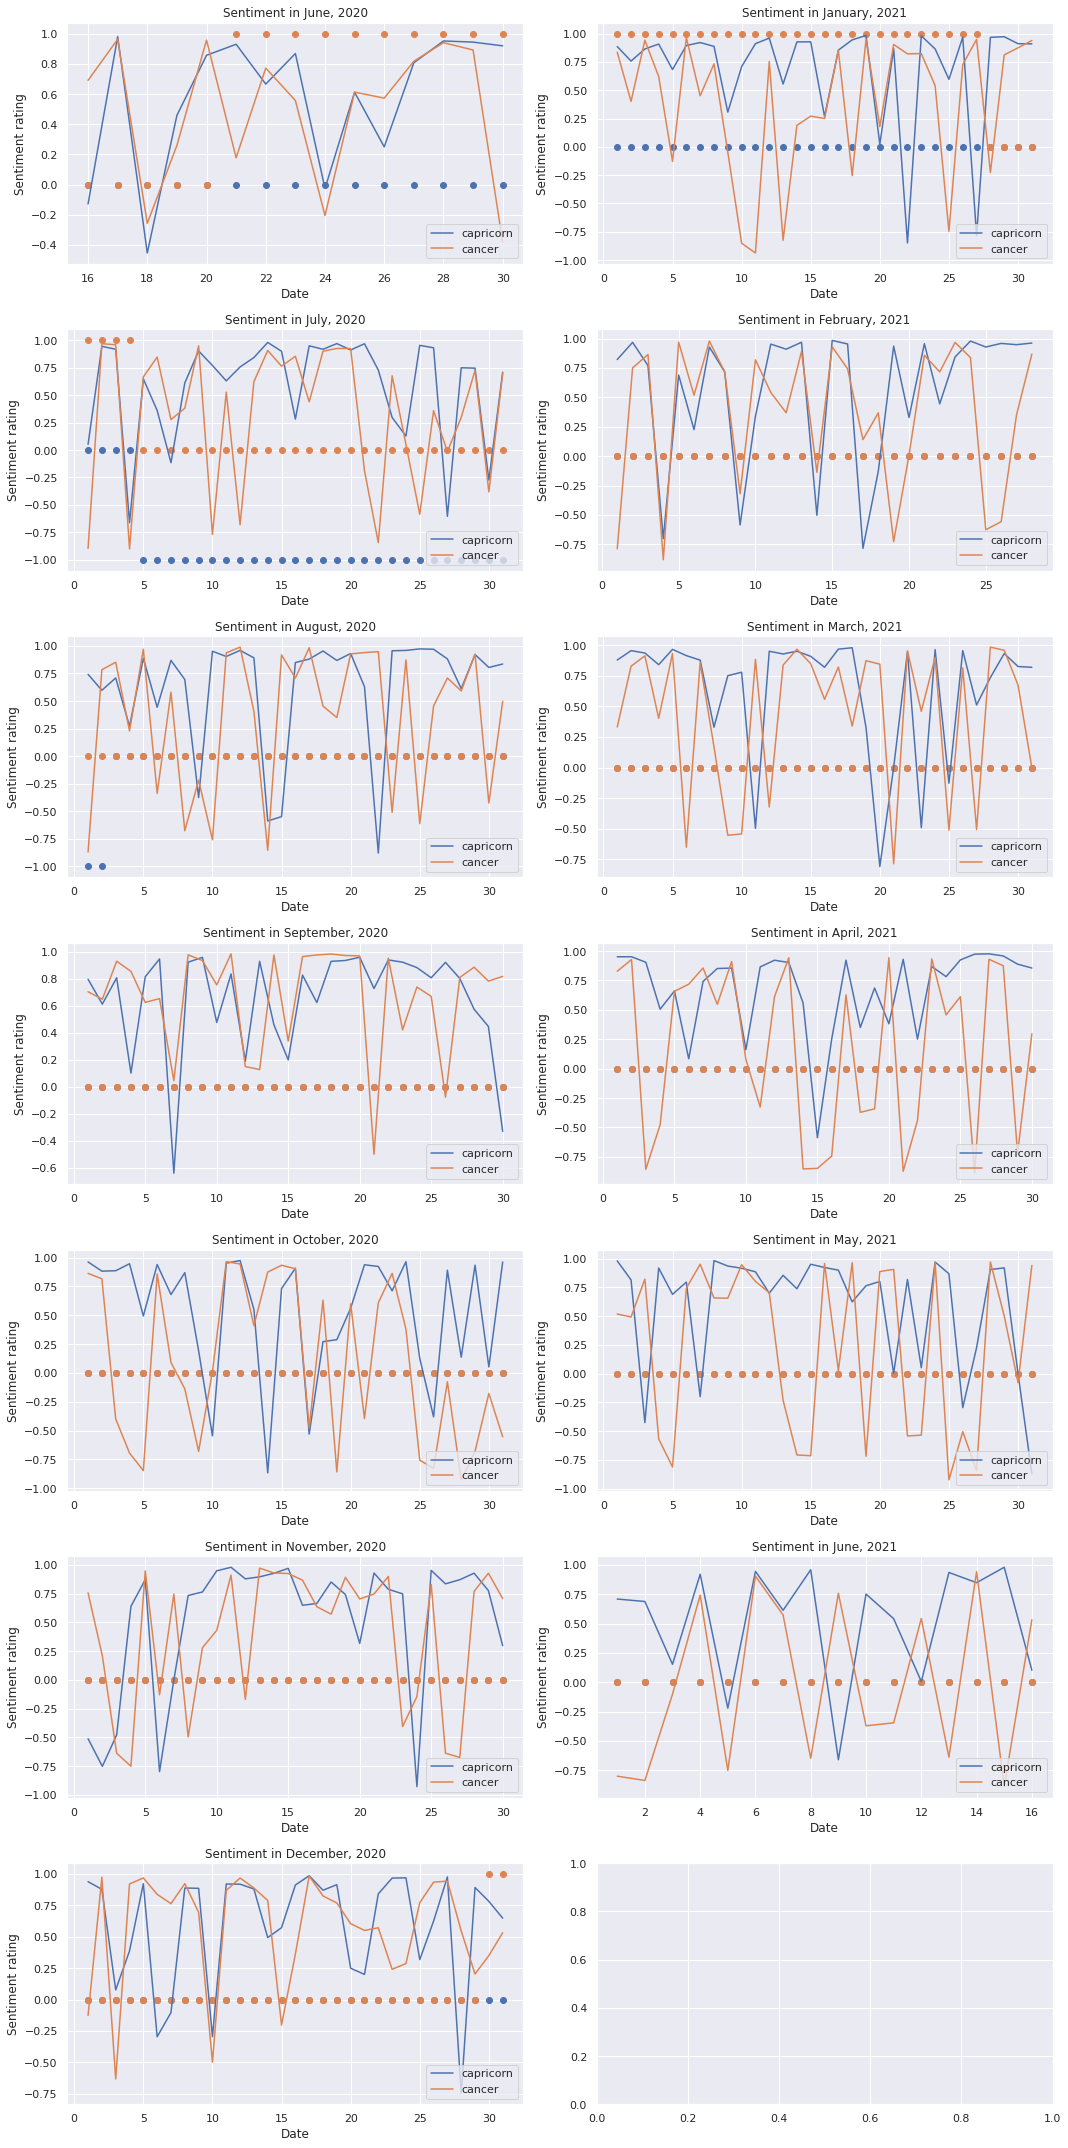

June  July August September October November December January  \
capricorn  0.58  0.58   0.63      0.65    0.53     0.52     0.60    0.70   
cancer     0.49  0.31   0.35      0.67    0.07     0.39     0.57    0.38   

          February March April   May  June  mean  
capricorn     0.57  0.64  0.68  0.59  0.52  0.60  
cancer        0.36  0.43  0.17  0.23 -0.02  0.34

In [59]:
compare_sentiments(df, ('capricorn', 'cancer'), 'general')

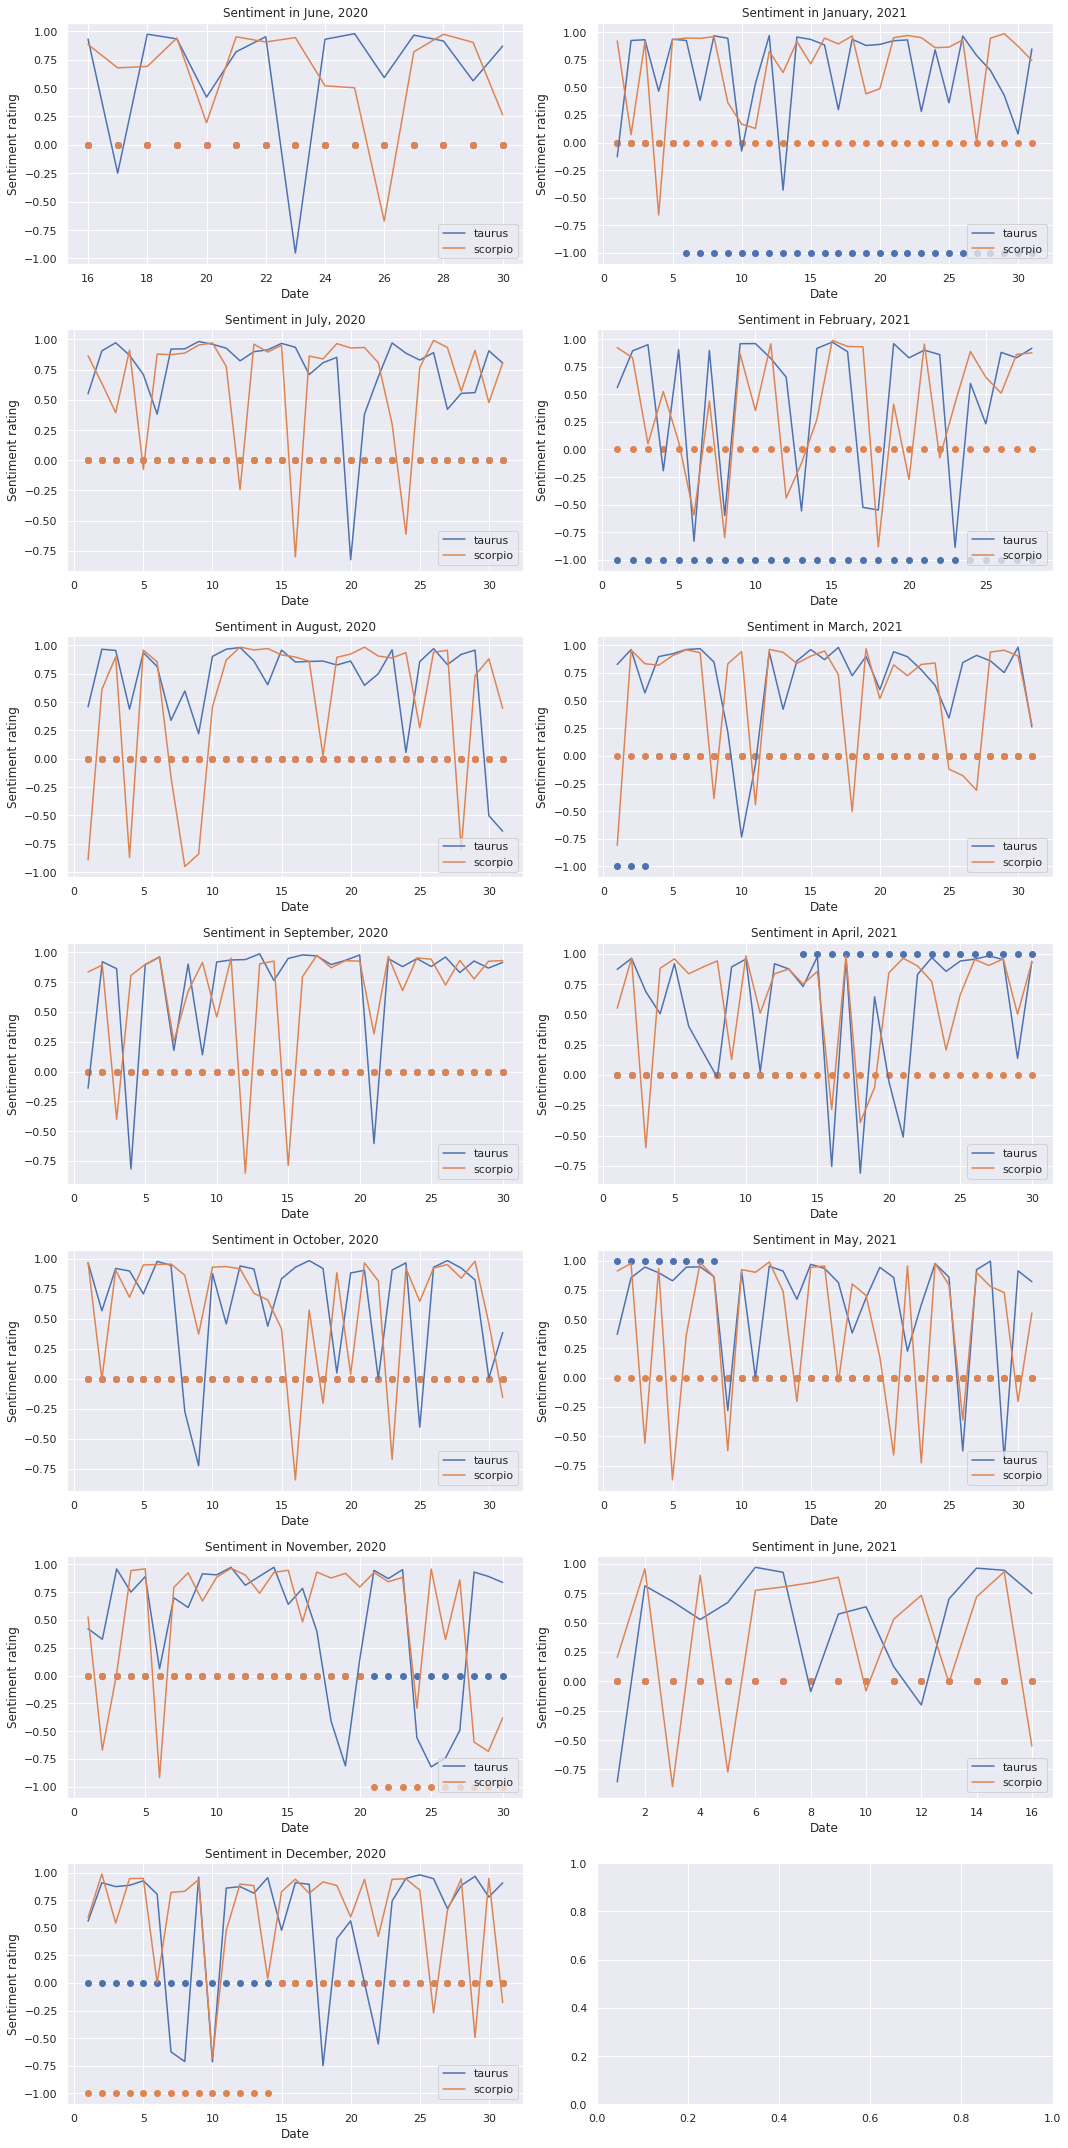

June  July August September October November December January  \
taurus   0.64  0.74   0.68      0.72    0.64     0.46     0.55    0.65   
scorpio  0.63  0.66   0.50      0.67    0.59     0.52     0.61    0.70   

        February March April   May  June  mean  
taurus      0.47  0.70  0.56  0.66  0.51  0.61  
scorpio     0.38  0.57  0.64  0.44  0.37  0.56

In [60]:
compare_sentiments(df, ('taurus', 'scorpio'), 'general')


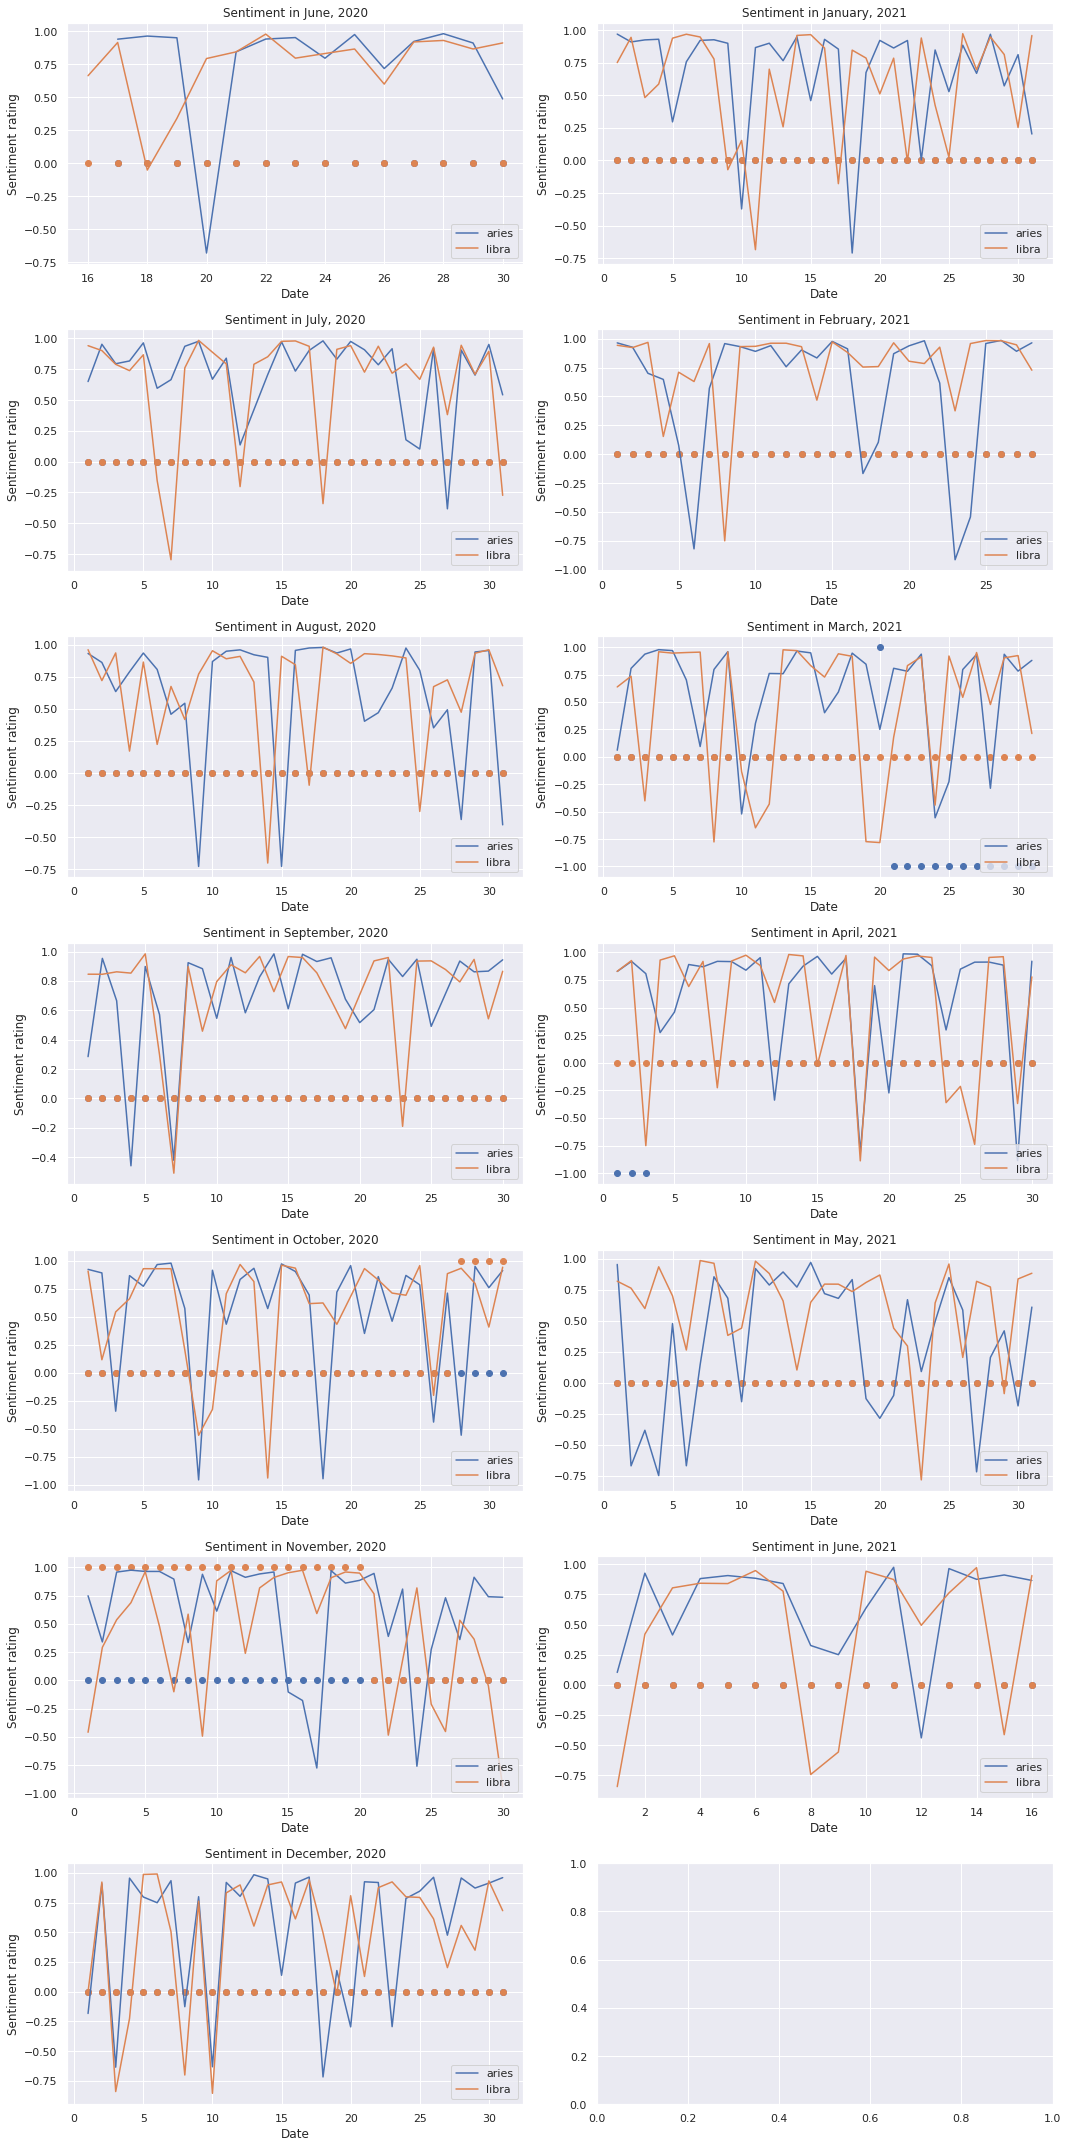

June  July August September October November December January February  \
aries  0.76  0.71   0.62      0.70    0.56     0.61     0.54    0.68     0.60   
libra  0.75  0.65   0.67      0.73    0.58     0.41     0.49    0.59     0.77   

      March April   May  June  mean  
aries  0.59  0.63  0.31  0.64  0.61  
libra  0.45  0.53  0.62  0.44  0.59

In [61]:
compare_sentiments(df, ('aries', 'libra'), 'general')

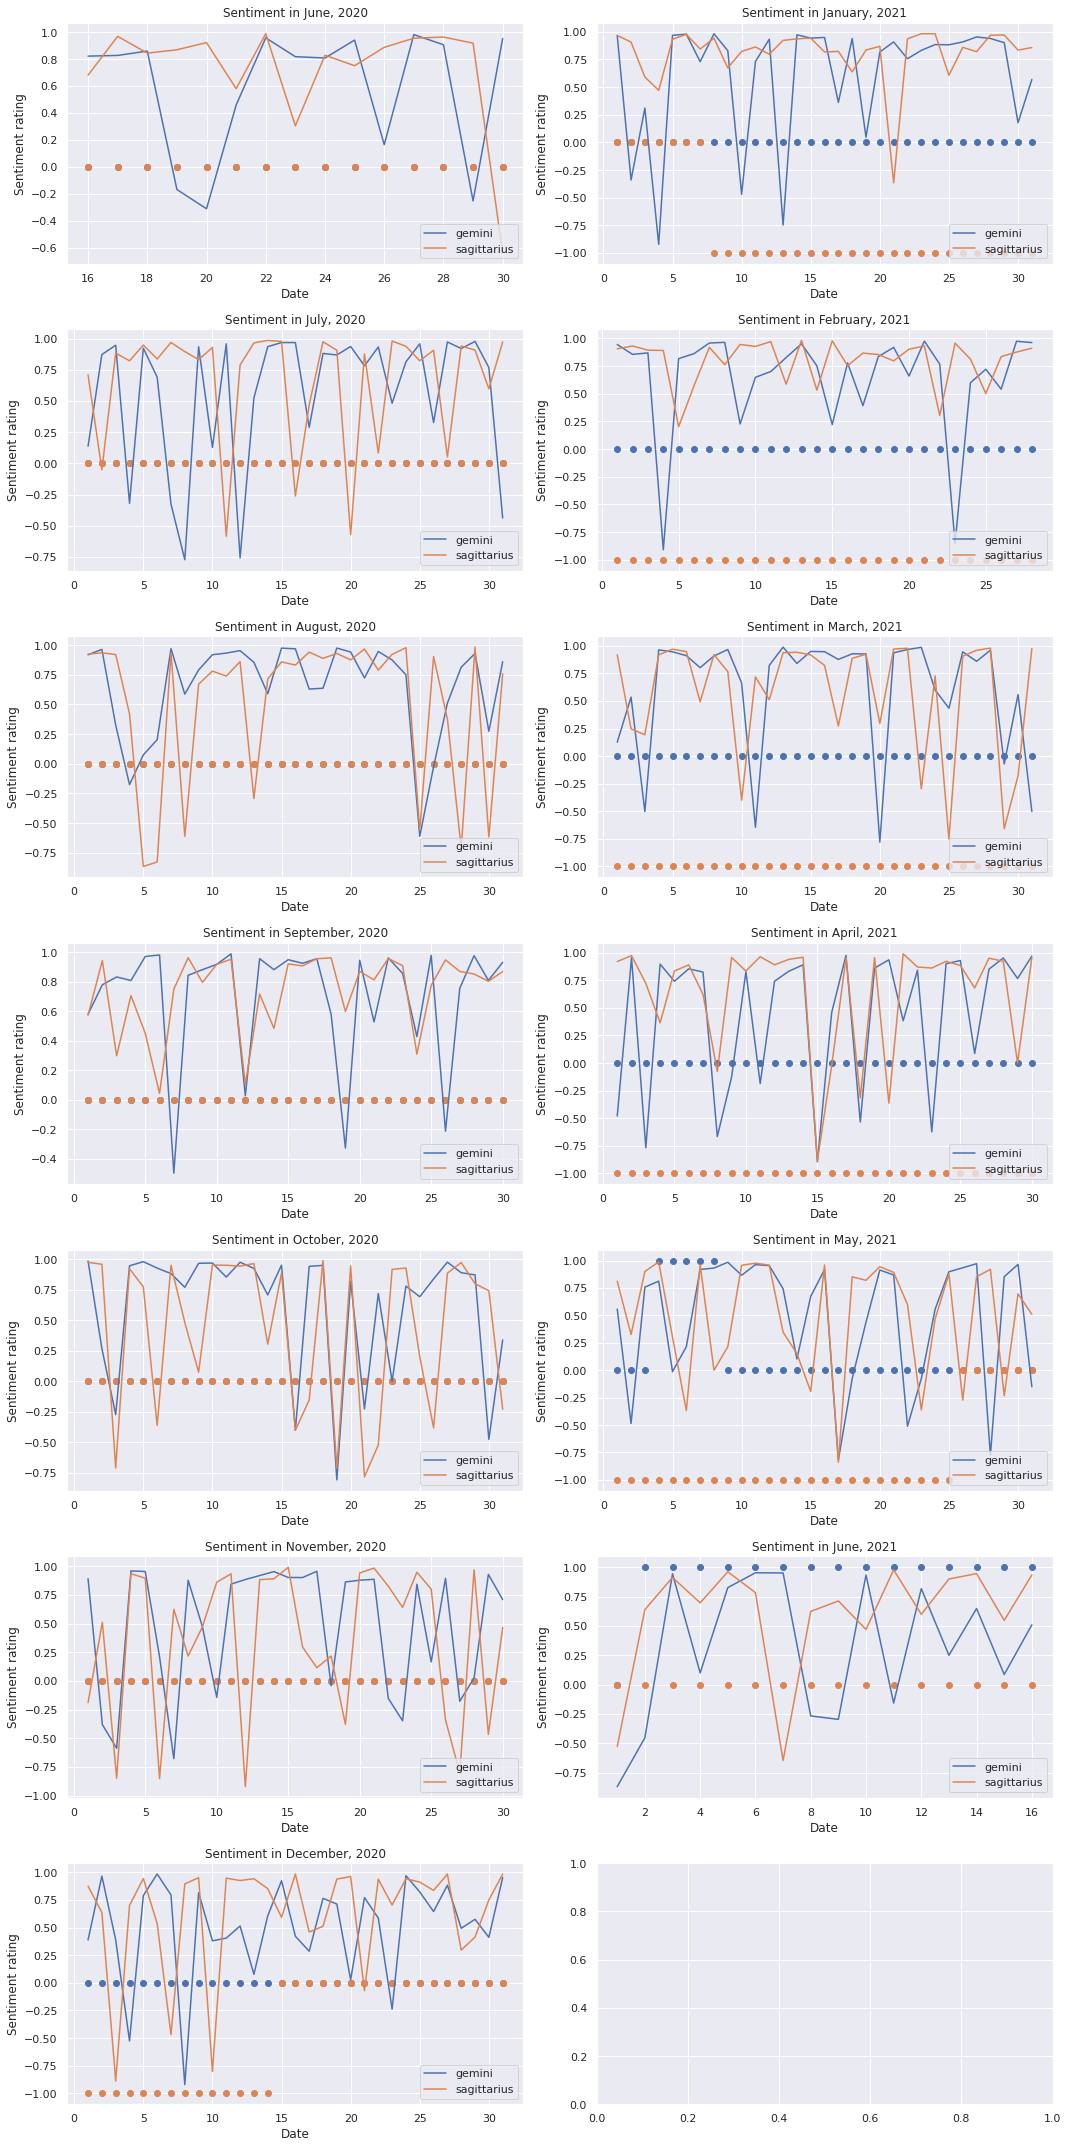

June  July August September October November December January  \
gemini       0.58  0.56   0.65      0.70    0.61     0.48     0.51    0.60   
sagittarius  0.72  0.66   0.50      0.73    0.43     0.35     0.62    0.81   

            February March April   May  June  mean  
gemini          0.64  0.61  0.44  0.48  0.31  0.55  
sagittarius     0.80  0.57  0.64  0.48  0.60  0.61

In [62]:
compare_sentiments(df, ('gemini', 'sagittarius'), 'general')

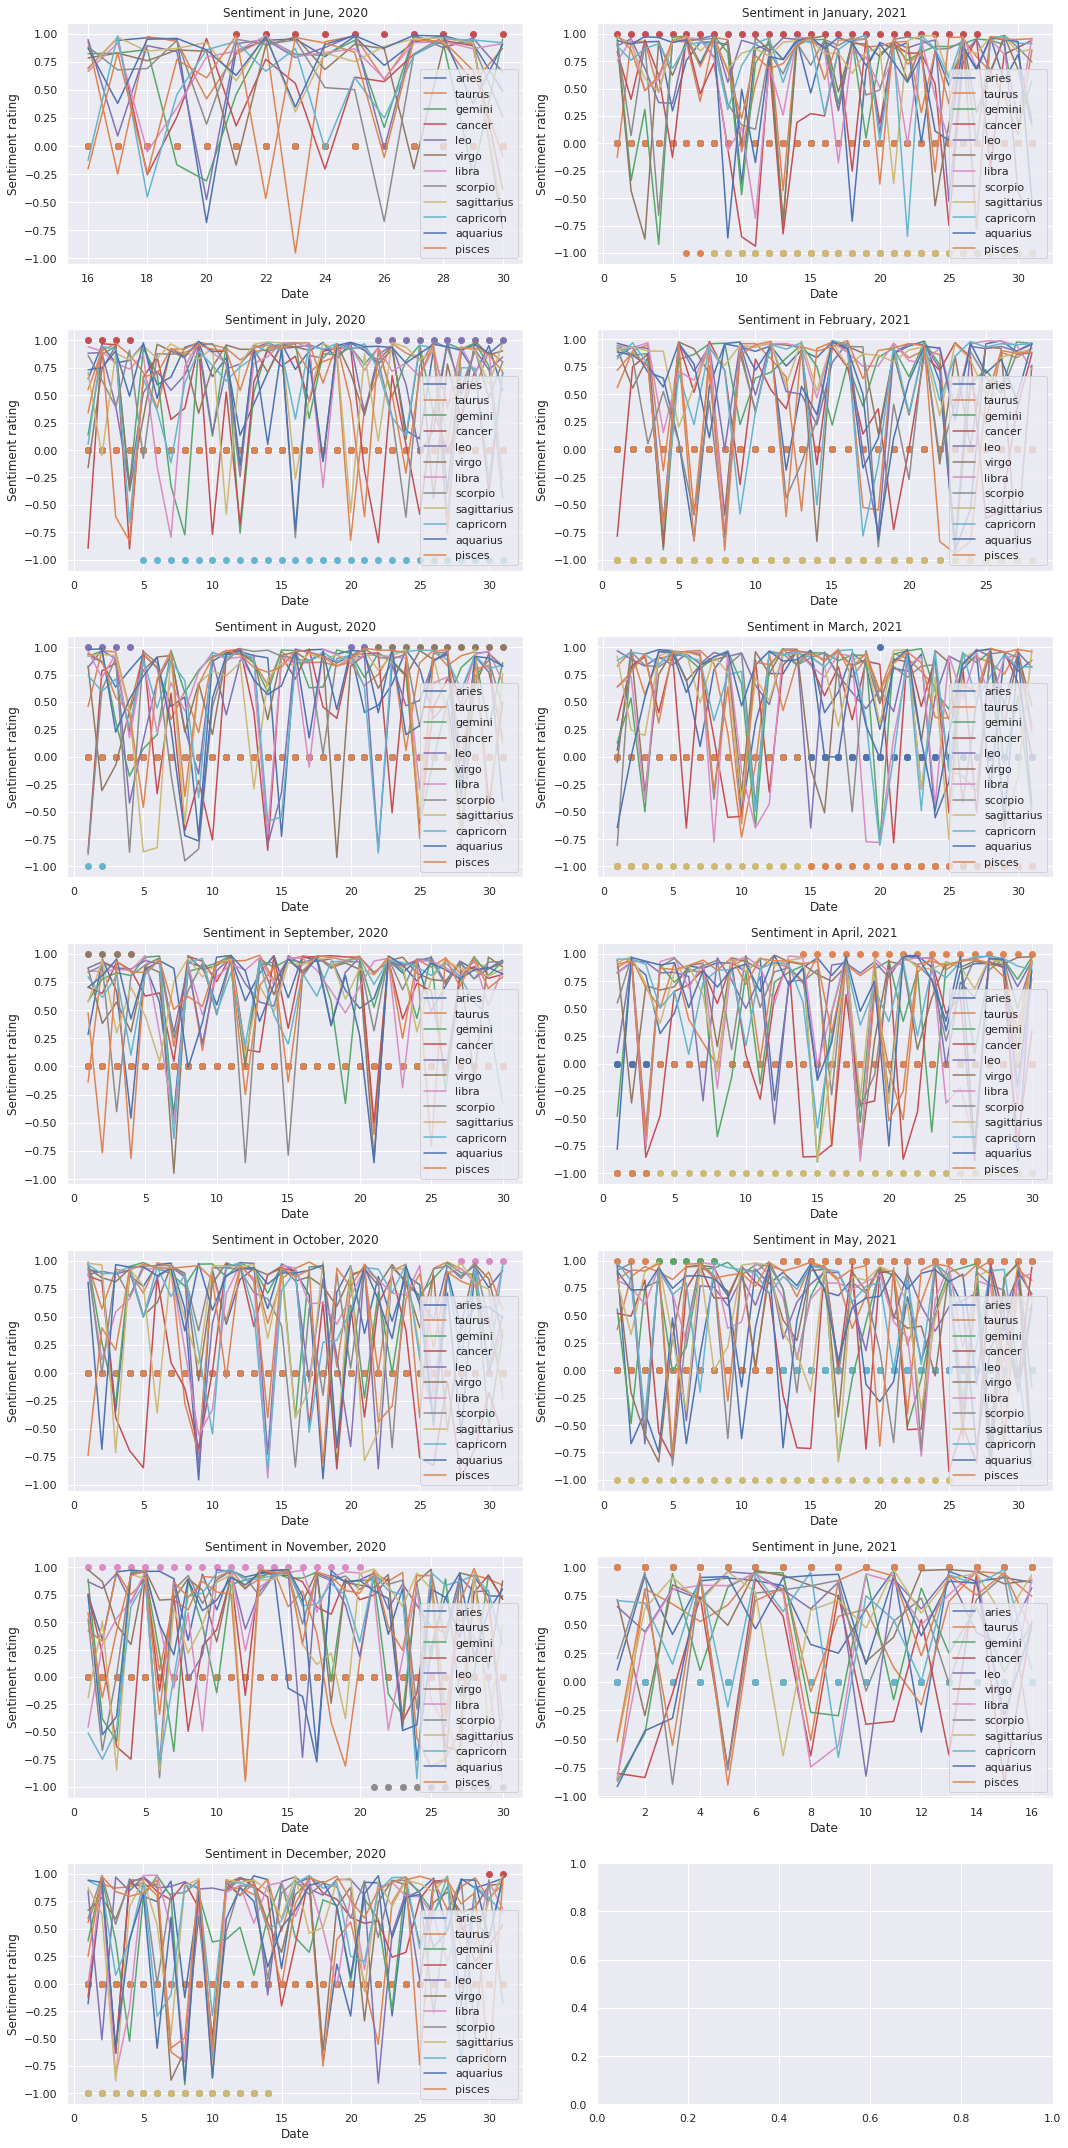

June  July August September October November December January  \
aries        0.76  0.71   0.62      0.70    0.56     0.61     0.54    0.68   
taurus       0.64  0.74   0.68      0.72    0.64     0.46     0.55    0.65   
gemini       0.58  0.56   0.65      0.70    0.61     0.48     0.51    0.60   
cancer       0.49  0.31   0.35      0.67    0.07     0.39     0.57    0.38   
leo          0.68  0.69   0.50      0.81    0.54     0.57     0.68    0.67   
virgo        0.61  0.63   0.65      0.66    0.73     0.66     0.55    0.56   
libra        0.75  0.65   0.67      0.73    0.58     0.41     0.49    0.59   
scorpio      0.63  0.66   0.50      0.67    0.59     0.52     0.61    0.70   
sagittarius  0.72  0.66   0.50      0.73    0.43     0.35     0.62    0.81   
capricorn    0.58  0.58   0.63      0.65    0.53     0.52     0.60    0.70   
aquarius     0.80  0.73   0.58      0.70    0.63     0.55     0.51    0.67   
pisces       0.49  0.58   0.67      0.64    0.55     0.57     0.57    0.70   

            February March April   May  June  mean  
aries           0.60  0.59  0.63  0.31  0.64  0.61  
taurus          0.47  0.70  0.56  0.66  0.51  0.61  
gemini          0.64  0.61  0.44  0.48  0.31  0.55  
cancer          0.36  0.43  0.17  0.23 -0.02  0.34  
leo             0.59  0.72  0.67  0.51  0.63  0.64  
virgo           0.51  0.58  0.70  0.40  0.70  0.61  
libra           0.77  0.45  0.53  0.62  0.44  0.59  
scorpio         0.38  0.57  0.64  0.44  0.37  0.56  
sagittarius     0.80  0.57  0.64  0.48  0.60  0.61  
capricorn       0.57  0.64  0.68  0.59  0.52  0.60  
aquarius        0.63  0.50  0.58  0.63  0.43  0.61  
pisces          0.45  0.73  0.72  0.73  0.43  0.60

In [63]:
signs = ['aries', 'taurus', 'gemini', 'cancer', 'leo', 'virgo', 'libra', 'scorpio', 'sagittarius', 'capricorn', 'aquarius', 'pisces']
compare_sentiments(df, signs, 'general')